In [1]:
import sympy as sym
from sympy import Matrix
# from mitroiki_functs import K_without_axial
# from mitroiki_functs import P_point_load_at_distance_a, P_uniformly_distributed_load
# from mitroiki_functs import round_expr

from common.statics.mitroiki_functs import K_without_axial
from common.statics.mitroiki_functs import P_point_load_at_distance_a, P_uniformly_distributed_load
from common.statics.mitroiki_functs import round_expr

import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt

In [2]:
E = 10_000.
I = 1.
L_ΕΑ = L0 = 1.5
L_ΑΒ = L1 = 5.0
L_ΒΔ = L_ΔΓ = 2.5
L2 = L_ΒΔ + L_ΔΓ

q_load = 30.
P_load = 100.

In [3]:
K_ΑΒ = K_ΒΓ = K_without_axial(E=E, I=I, L=L1)
K_ΑΒ

Matrix([
[ 960.0,  2400.0,  -960.0,  2400.0],
[2400.0,  8000.0, -2400.0,  4000.0],
[-960.0, -2400.0,   960.0, -2400.0],
[2400.0,  4000.0, -2400.0,  8000.0]])

| Καθολ. Συστ. | (1) | (2) | (3) | (4) | (5) | (6) | (7) |
|--------------|-----|-----|-----|-----|-----|-----|-----|
| ΑΒ           | -   | 1   | 2   | 3   | 4   | -   | -   |
| ΒΓ           | 1   | -   | -   | -   | 2   | 3   | 4   |



<!-- | Header      | <span style="color:red">text</span>       | Here's this   | | | | | -->

In [4]:
K_temp_ΑΒ = sym.zeros(7,7)
K_temp_ΑΒ[1:5, 1:5] += K_ΑΒ
K_temp_ΑΒ

Matrix([
[0,      0,       0,       0,       0, 0, 0],
[0,  960.0,  2400.0,  -960.0,  2400.0, 0, 0],
[0, 2400.0,  8000.0, -2400.0,  4000.0, 0, 0],
[0, -960.0, -2400.0,   960.0, -2400.0, 0, 0],
[0, 2400.0,  4000.0, -2400.0,  8000.0, 0, 0],
[0,      0,       0,       0,       0, 0, 0],
[0,      0,       0,       0,       0, 0, 0]])

In [5]:
K_temp_ΒΓ = sym.zeros(7,7)
K_temp_ΒΓ[0, 0] += K_ΒΓ[0, 0]
K_temp_ΒΓ[0, 4:7] += K_ΒΓ[0, 1:4]
K_temp_ΒΓ[4:7, 0] += K_ΒΓ[1:4, 0]
K_temp_ΒΓ[4:7, 4:7] += K_ΒΓ[1:, 1:]
K_temp_ΒΓ

Matrix([
[ 960.0, 0, 0, 0,  2400.0,  -960.0,  2400.0],
[     0, 0, 0, 0,       0,       0,       0],
[     0, 0, 0, 0,       0,       0,       0],
[     0, 0, 0, 0,       0,       0,       0],
[2400.0, 0, 0, 0,  8000.0, -2400.0,  4000.0],
[-960.0, 0, 0, 0, -2400.0,   960.0, -2400.0],
[2400.0, 0, 0, 0,  4000.0, -2400.0,  8000.0]])

In [6]:
K = K_temp_ΑΒ + K_temp_ΒΓ
K

Matrix([
[ 960.0,      0,       0,       0,  2400.0,  -960.0,  2400.0],
[     0,  960.0,  2400.0,  -960.0,  2400.0,       0,       0],
[     0, 2400.0,  8000.0, -2400.0,  4000.0,       0,       0],
[     0, -960.0, -2400.0,   960.0, -2400.0,       0,       0],
[2400.0, 2400.0,  4000.0, -2400.0, 16000.0, -2400.0,  4000.0],
[-960.0,      0,       0,       0, -2400.0,   960.0, -2400.0],
[2400.0,      0,       0,       0,  4000.0, -2400.0,  8000.0]])

In [7]:
K_UU = K[[0, 2, 4], [0, 2, 4]]
K_UU

Matrix([
[ 960.0,      0,  2400.0],
[     0, 8000.0,  4000.0],
[2400.0, 4000.0, 16000.0]])

In [8]:
K_RU = K[[1, 3, 5, 6], [0, 2, 4]]
K_RU

Matrix([
[     0,  2400.0,  2400.0],
[     0, -2400.0, -2400.0],
[-960.0,       0, -2400.0],
[2400.0,       0,  4000.0]])

In [9]:
# from anastruct import SystemElements

In [10]:
P = Matrix([[50], [-120], [-28.75], [-75], [125], [50], [-62.5]])
P 

Matrix([
[    50],
[  -120],
[-28.75],
[   -75],
[   125],
[    50],
[ -62.5]])

In [11]:
P_U = P[[0, 2, 4], 0]
P_U

Matrix([
[    50],
[-28.75],
[   125]])

In [12]:
P_R = P[[1, 3, 5, 6], 0]
P_R

Matrix([
[ -120],
[  -75],
[   50],
[-62.5]])

In [13]:
U_U = K_UU.inv() * P_U
round_expr(U_U, 5)

Matrix([
[ 0.04759],
[-0.00449],
[  0.0018]])

In [14]:
U = Matrix([[U_U[0]], [-0], [U_U[1]], [0], [U_U[2]], [0], [0]])
round_expr(U, 5)

Matrix([
[ 0.04759],
[       0],
[-0.00449],
[       0],
[  0.0018],
[       0],
[       0]])

In [15]:
R = K * U - P
round_expr(R, 2)

Matrix([
[     0],
[113.53],
[     0],
[ 81.47],
[     0],
[-100.0],
[183.91]])

Current Domain Information
	Current Time: 1
	Committed Time: 1
NODE DATA: NumNodes: 4

numComponents: 4

 Node: 1
	Coordinates  : 0 5 
	Disps: 0.0476064 0.00485359 -0.00281385 
	 unbalanced Load: 0 0 0 
	ID : 5 6 7 


 Node: 2
	Coordinates  : 1.5 5 
	Disps: 0.0476064 0 -0.00450135 
	 unbalanced Load: 0 0 0 
	ID : 3 -1 4 


 Node: 3
	Coordinates  : 6.5 5 
	Disps: 0.0476064 -4.07332e-05 0.00179077 
	 unbalanced Load: 0 0 0 
	ID : 0 1 2 


 Node: 4
	Coordinates  : 6.5 0 
	Disps: 0 0 0 
	 unbalanced Load: 0 0 0 
	ID : -1 -1 -1 

ELEMENT DATA: NumEle: 3

numComponents: 3

ElasticBeam2d: 1
	Connected Nodes: 1 2 
	CoordTransf: 1
	mass density:  0, cMass: 0
	release code:  0
	End 1 Forces (P V M): -4.62593e-11 2.84217e-14 -3.55271e-15
	End 2 Forces (P V M): 4.62593e-11 45 -33.75

ElasticBeam2d: 2
	Connected Nodes: 2 3 
	CoordTransf: 1
	mass density:  0, cMass: 0
	release code:  0
	End 1 Forces (P V M): -5.55112e-11 68.5337 33.75
	End 2 Forces (P V M): 5.55112e-11 81.4663 -66.0815

ElasticBeam2

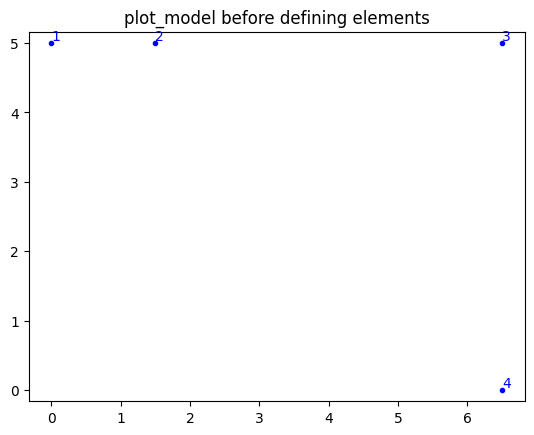

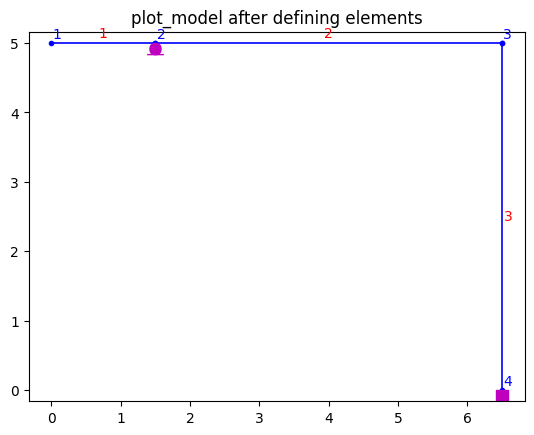

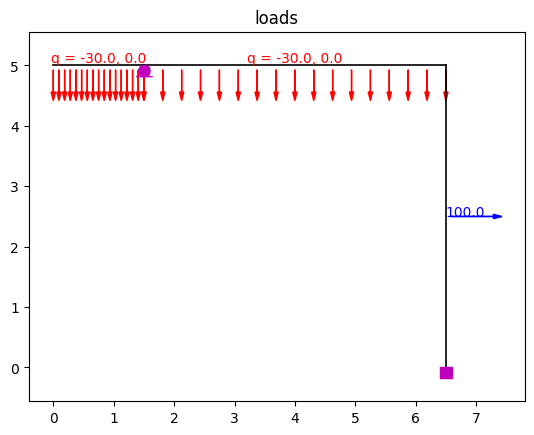

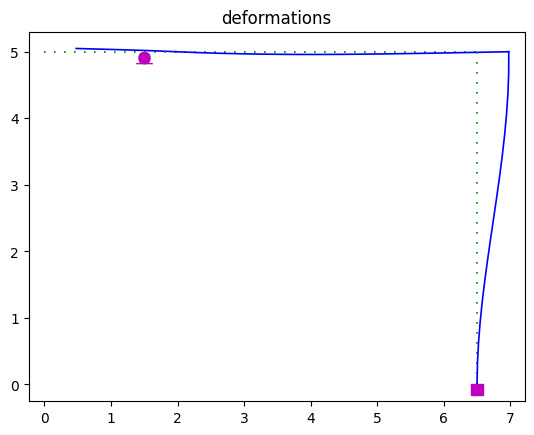

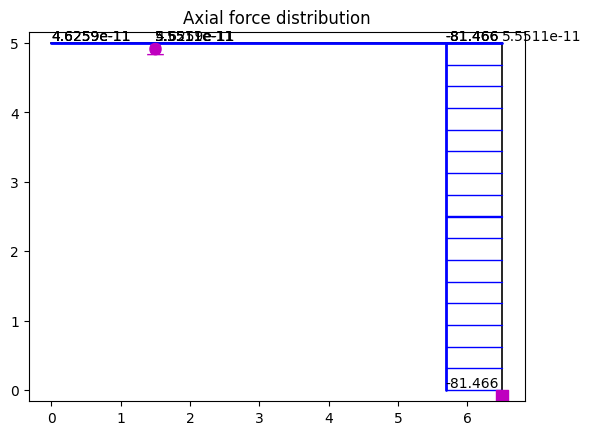

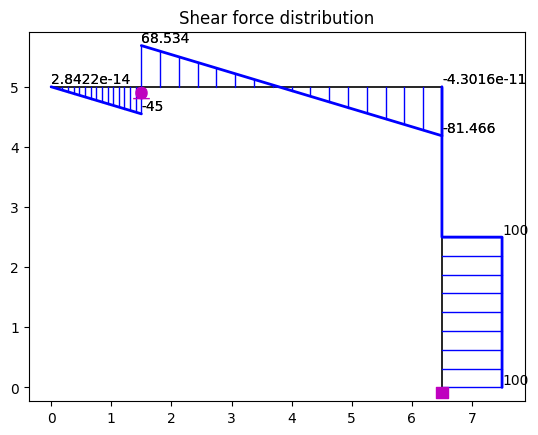

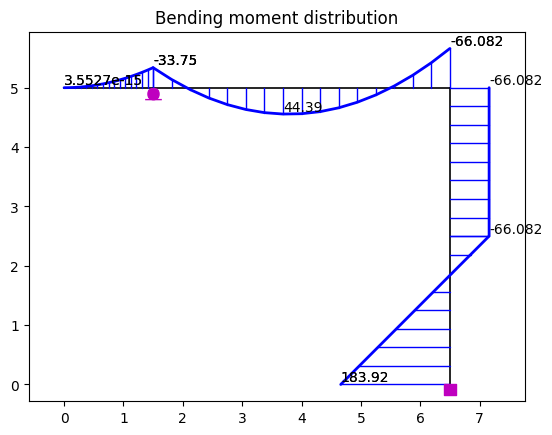

In [16]:
ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)

A = 1000.
I = 1.
E = 10_000.

ops.node(1, 0., L2)
ops.node(2, L0, L2)
ops.node(3, L0+L1, L2)
ops.node(4, L0+L1, 0)

ops.fix(2, 0, 1, 0)
ops.fix(4, 1, 1, 1)

opsv.plot_model()

plt.title('plot_model before defining elements')

ops.geomTransf('Linear', 1)

# elements
ops.element('elasticBeamColumn', 1, 1, 2, A, E, I, 1)
ops.element('elasticBeamColumn', 2, 2, 3, A, E, I, 1)
ops.element('elasticBeamColumn', 3, 3, 4, A, E, I, 1)


# loads
ops.timeSeries('Constant', 1)
ops.pattern('Plain', 1, 1)

ops.eleLoad('-ele', 1, '-type', '-beamUniform', -q_load)
ops.eleLoad('-ele', 2, '-type', '-beamUniform', -q_load)
ops.eleLoad('-ele', 3, '-type', '-beamPoint', P_load, 0.5)


# analysis
ops.constraints('Transformation')
ops.numberer('RCM')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1.0e-6, 6, 2)
ops.algorithm('Linear')
ops.integrator('LoadControl', 1)
ops.analysis('Static')
ops.analyze(1)

# results
ops.printModel()
opsv.plot_model()
plt.title('plot_model after defining elements')

opsv.plot_loads_2d()
plt.title('loads')

sfac = 10.
opsv.plot_defo(sfac)
plt.title('deformations')

sfacN, sfacV, sfacM = 1.e-2, 1.e-2, 1.e-2
opsv.section_force_diagram_2d('N', sfacN)
plt.title('Axial force distribution')

opsv.section_force_diagram_2d('T', sfacV)
plt.title('Shear force distribution')

opsv.section_force_diagram_2d('M', sfacM)
plt.title('Bending moment distribution')


plt.show()



| Header      | <span style="color:red">text</span>       | Here's this   | | | | |